In [4]:
import json
with open("token_iid.json", 'r') as f:
    # Load the JSON data from the file
    token_iid = json.load(f)

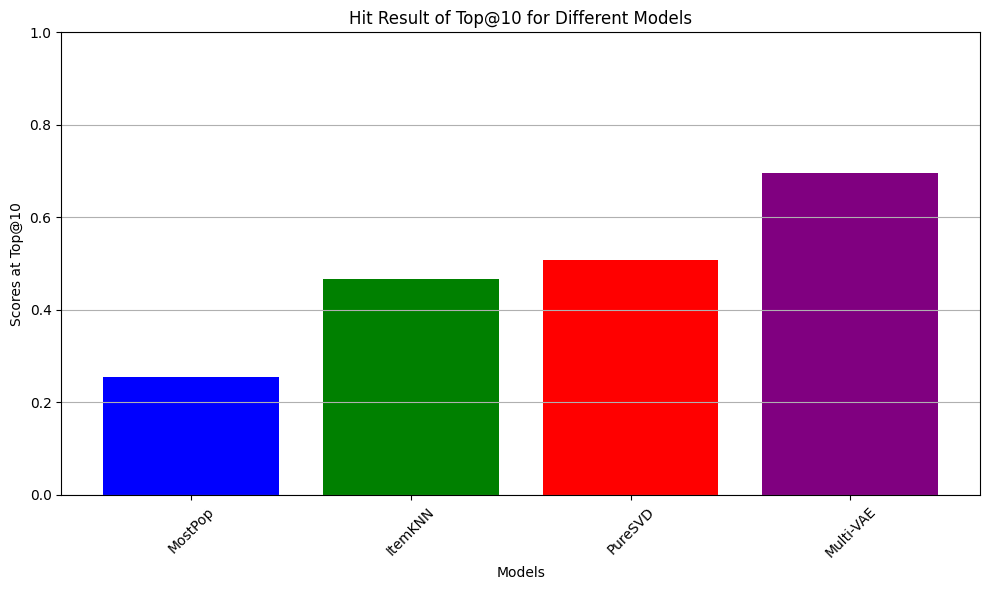

In [9]:
import matplotlib.pyplot as plt

# Data from the CSV
models = ['MostPop', 'ItemKNN', 'PureSVD', 'Multi-VAE']
top_10_scores = [0.25376996437309673, 0.46634333271924616, 0.5068037271225002, 0.6969479868175956]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, top_10_scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Scores at Top@10')
plt.title('Hit Result of Top@10 for Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()

In [36]:
import json
with open("user_bboxs_filtered_1.json", 'r') as f:
    # Load the JSON data from the file
    user_bboxs_filtered = json.load(f)

In [37]:
user_bboxs_filtered

{'33468': [29.941958, 40.7101961875, -90.0652612, -74.7236385919],
 '6561': [31.707232599999998, 39.954044, -111.4808639, -75.15598],
 '26154': [29.462102, 30.462102, -90.587958, -89.587958],
 '37645': [39.449529, 40.449529, -75.652139, -74.652139],
 '3792': [31.755833600000003, 32.7558336, -111.4605596, -110.4605596],
 '31038': [38.1195426345, 39.1195426345, -90.7558054466, -89.7558054466],
 '12989': [39.4446092, 40.4446092, -75.6578331, -74.6578331],
 '21956': [27.9609642, 40.4569253992, -90.0716247045, -82.4404634],
 '39754': [38.6272097, 40.4497563, -90.2540299, -74.6480623],
 '19090': [29.9553597, 40.412505, -90.0649145, -85.711285],
 '13820': [39.365032, 40.365032, -75.8440508, -74.8440508],
 '3927': [29.9543923897, 39.654379, -120.3247056485, -74.79506],
 '25253': [39.453291, 40.453291, -75.673645, -74.673645],
 '41691': [27.6900210385, 28.6900210385, -83.0404296573, -82.0404296573],
 '10462': [39.0287886, 40.0287886, -120.3143539, -119.3143539],
 '23832': [29.459824, 30.459824,

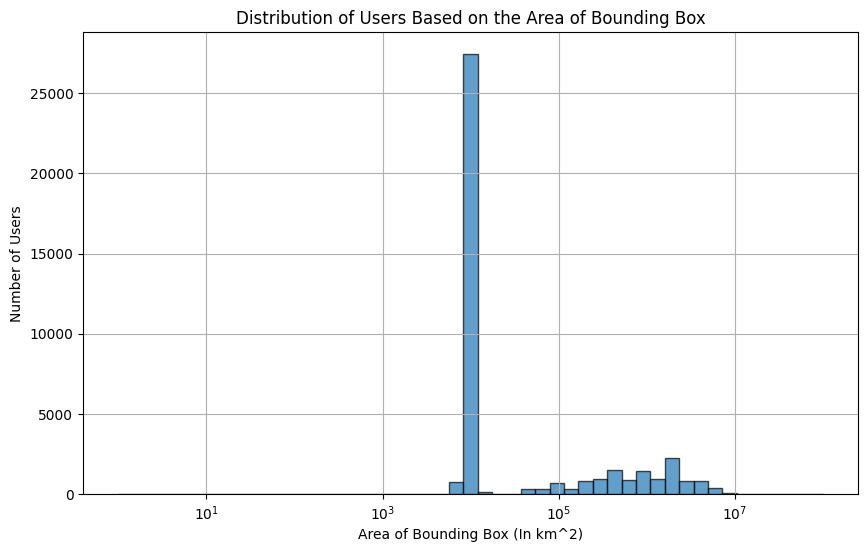

In [38]:
# import matplotlib.pyplot as plt
import numpy as np
from math import radians, cos, sin, asin, sqrt
# Calculate the area of the bounding box for each user
areas = []
point = 0


def haversine(self, lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

def bounding_box_area(self, min_lat, max_lat, min_lon, max_lon):
    """
    Calculate the area of a bounding box in square kilometers
    """
    # Height of the bounding box in km (distance between the min and max latitudes)
    height = self.haversine((min_lon + max_lon) / 2, min_lat, (min_lon + max_lon) / 2, max_lat)
    
    # Width of the bounding box at min_lat and max_lat, then take the average
    width_min_lat = self.haversine(min_lon, min_lat, max_lon, min_lat)
    width_max_lat = self.haversine(min_lon, max_lat, max_lon, max_lat)
    width = (width_min_lat + width_max_lat) / 2
    
    # Area in square kilometers
    area = width * height
    return area



for coords in user_bboxs_filtered.values():
    min_lat, max_lat, min_lon, max_lon = coords
    # Assuming the area can be approximated by (delta_lat * delta_lon)
    # This is a simplification and works best for small differences
    area = bounding_box_area(min_lat, max_lat, min_lon, max_lon)
    areas.append(area)

# Assuming "areas" is the list of area values that we're plotting.
# We'll create a histogram with a smaller bin width for the range 10^2 to 10^5.

# # Generate bins logarithmically spaced between 10^2 and 10^5
# bins_log_space = np.logspace(np.log10(1), np.log10(100000000), num=50)

# # Plotting with custom bins
# plt.figure(figsize=(10, 6))
# plt.hist(areas, bins=bins_log_space, edgecolor='k', alpha=0.7)
# plt.xlabel('Area of Bounding Box (In km^2)')
# plt.ylabel('Number of Users')
# plt.title('Distribution of Users Based on the Area of Bounding Box')
# plt.grid(True)
# plt.xscale('log')  # Keep the log scale for the x-axis
# plt.show()



In [39]:
import csv
file_path = 'user_bounding_box_size_1.csv'

# Open the file in write mode ('w') and create a csv.writer object
# newline='' is used to prevent writing extra blank rows in some environments
with open(file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Optionally, write headers as the first row
    writer.writerow(['user','area'])
    
    # Write the contents of both lists to the file, row by row
    for item1, item2 in zip(list(user_bboxs_filtered.keys()), areas):
        writer.writerow([ item1, item2])

# Inform the user that the lists have been written to the file
print(f"Lists have been written to {file_path}")

Lists have been written to user_bounding_box_size_1.csv


In [40]:
min(areas)

7328.949791344995

In [28]:
len(user_bboxs_filtered)

40812

In [50]:
import numpy as np

# Assuming the CSV data is saved in 'data.csv'
filename = 'filter_percentage_0.05.csv'

# Reading the CSV data into a NumPy array
data_np = np.genfromtxt(filename, delimiter=',', skip_header=1)

avg = np.mean(data_np, axis=0)
std_dev = np.std(data_np, axis=0)

print(avg, std_dev)


[21235.23035096    23.99147062    99.79411334] [1.22495772e+04 3.04532145e+01 2.13597860e-01]


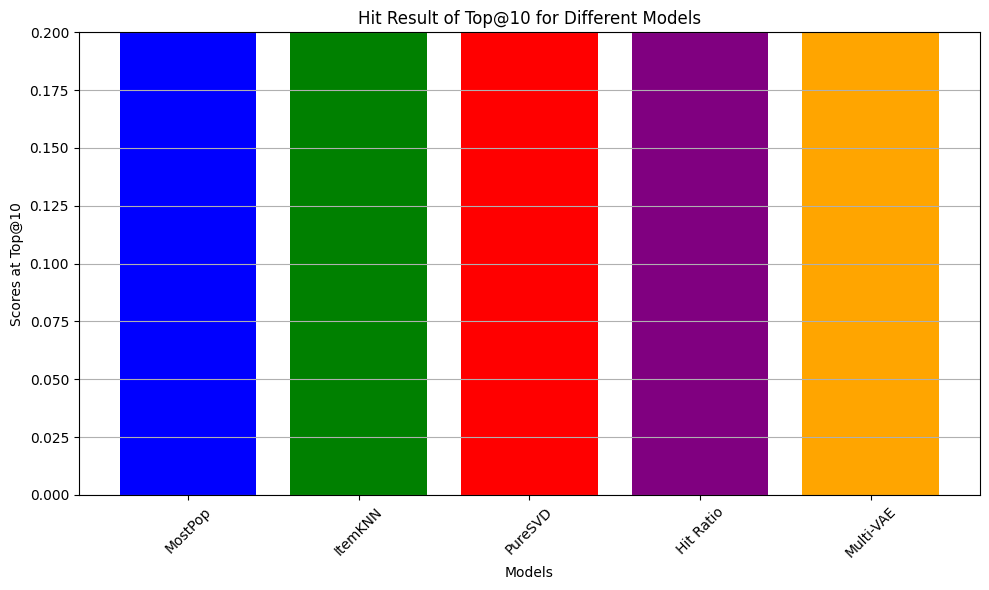

In [3]:
import matplotlib.pyplot as plt

# Data from the CSV
models = ['MostPop', 'ItemKNN', 'PureSVD', 'Hit Ratio', 'Multi-VAE']
top_10_scores = [0.25376996437309673, 0.46634333271924616, 0.5068037271225002, 0.6969479868175956, 0.24668648803553522]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, top_10_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Models')
plt.ylabel('Scores at Top@10')
plt.title('Hit Result of Top@10 for Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 0.2)
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()


In [15]:
%history

import matplotlib.pyplot as plt

# Data from the CSV
models = ['Recall', 'MRR', 'NDCG', 'Hit Ratio', 'Precision']
top_10_scores = [0.25376996437309673, 0.46634333271924616, 0.5068037271225002, 0.6969479868175956, 0.24668648803553522]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, top_10_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Models')
plt.ylabel('Scores at Top@10')
plt.title('Hit Result of Top@10 for Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 0.8)
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()
import matplotlib.pyplot as plt

# Data from the CSV
models = ['MostPop', 'ItemKNN', 'PureSVD', 'Hit Ratio', 'Multi-VAE']
top_10_scores = [0.25376996437309673, 0.46634333271924616, 0.5068037271225002, 0.6969479868175956, 0.24668648803553522]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, top_10_scores, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Models')
plt.ylabel('Scores at Top@10')
plt.title('Hit R

In [30]:
len(token_iid)

NameError: name 'token_iid' is not defined

In [6]:
import json
with open("token_uid.json", 'r') as f:
    # Load the JSON data from the file
    token_uid = json.load(f)

In [33]:
token_uid

{'-2nNiAnDaSbQayynsqgL6Q': 0,
 '-3s52C4zL_DHRK0ULG6qtg': 1,
 '-4vkTh2rImD8c0-30h2uvw': 2,
 '-7XrSrJfHndHc_taEXurTw': 3,
 '-7qUbOVWJp2NT3f_TNuIBA': 4,
 '-8PU0Z4Q2Nc-sY0eBj4DiQ': 5,
 '-B-QEUESGWHPE_889WJaeg': 6,
 '-Bv2DxQtG7xPYdJqlqL9fQ': 7,
 '-CzwjrantVGMmZB8Qj_7-Q': 8,
 '-FxsSuwDbIII7yo5BjHpiA': 9,
 '-G7Zkl1wIWBBmD0KRy_sCw': 10,
 '-GDdBOfhrxn7lAGblLSoqA': 11,
 '-GowNe73gDZs9MfS3ugJDQ': 12,
 '-HYCAMf2ml717YD5Y9PKIg': 13,
 '-KduD3wwydWDq2GrODh2tw': 14,
 '-NycZLw5rPxqwrkKKI-83w': 15,
 '-Oer2os7LrtAagVuWSN1AQ': 16,
 '-Oqfoc4KyhzYY0qvSkxkrg': 17,
 '-PHhewouMe4OcObjdqBWAA': 18,
 '-Pb9gXleMSXS8quej_zL1Q': 19,
 '-QmEKJ_CzZnT9biZHddfZQ': 20,
 '-SigNCNItQDtSq27j0t_tw': 21,
 '-THLGnsYKu3yQAsy_tt1fw': 22,
 '-TLXQfY2lZ6DVWQj4BosxQ': 23,
 '-Tg5YTEMbnYw3fQN99xKCQ': 24,
 '-V7frksbFjKQYVhrPnnlPw': 25,
 '-WdMmmWVU5TZ9bfy0Cg3Ng': 26,
 '-ZHlPAvlVdgtiu6DiCq7Yg': 27,
 '-_OH-t_Tnm3-I2RpPjEjwA': 28,
 '-_Y8Mal7S750TsB6yMMDHA': 29,
 '-aAgfEUH4UoFDRXZCfJSUA': 30,
 '-dN3ww2WYLkwAbZtJHcLHQ': 31,
 '-dgC1iRp_JqBTmn5

In [21]:
import json
with open("user_bboxs.json", 'r') as f:
    # Load the JSON data from the file
    user_bboxs = json.load(f)

In [40]:
# Counter for users meeting the criteria
count_meeting_criteria = 0

# Iterate through the user_dict to check each bounding box
for user, bbox in user_bboxs.items():
    min_lat, max_lat, min_lon, max_lon = bbox
    # Check if the differences are less than one
    if (max_lat - min_lat) < 1 and (max_lon - min_lon) < 1:
        count_meeting_criteria += 1

count_meeting_criteria

1854723

In [43]:
len(user_bboxs)

1987929

In [44]:
user_bboxs['-2nNiAnDaSbQayynsqgL6Q']

[36.1765085, 39.9933392292, -86.7756494, -86.0029699]

In [2]:
import pickle
with open('data/yelp/items_within_bb_ori.pkl', 'rb') as file:
    # Load the content of the file into a variable
    items_within_bb = pickle.load(file)

MemoryError: 

In [45]:
import json

# Path to the Yelp review JSON file
filename = 'data\yelp\yelp_academic_dataset_review.json'
# User ID you're interested in
user_id_of_interest = '-2nNiAnDaSbQayynsqgL6Q'
# Prepare a set to hold the business IDs (or names) to ensure uniqueness
businesses_visited = set()

# Open the file and read line by line
with open(filename, 'r') as file:
    for line in file:
        # Convert the JSON string to a Python dictionary
        review = json.loads(line)
        # print(review)
        # Check if the review's user ID matches the user ID of interest
        if review['user_id'] == user_id_of_interest:
            # If it matches, add the business ID (or name) to the set
            businesses_visited.add(review['business_id']) # or review['business_name'] if available

# Print out the list of unique business IDs (or names) the user has visited
print("Businesses visited by the user:", businesses_visited)


Businesses visited by the user: {'gUEPLH8b-j3w_M1o6_aNNQ', 'e4cfEYcXSZ2j0EQ-F06sJA', 'vE8jdM9mi0UzRkogyfR8Ng', '2fR1CGBMJALRDmveY9D08Q', 'sDHUhFN0Kcbd8TUqn0NB7A', 'Rv1BXAAvbqvFyY0zigkmAA', 'c4sZmWea1ULin4AsX1wp0A', 'QHA-T3p3jbn2yb9EdaUc7g', 'X6Oamdp2E_-hLTxtGt2fEQ', 'chjIM0d2a0LMlFwk6ccSDQ', 'aREOVt958pzJsuNmX1-LUQ', 'XkJRZ4D68ZGPGUywjvhicA', '6P3fSXV9QTTNufOmN2-0rg', '80cGp3IFlveDqwDiRENOHg', 'j2l_J1M_XdtVtkvuv1ZPkQ', 'qI0U2Vvmt3wwGiTR35_EdA', 'AmnnsJq4Pz1jJUFzHwtsOA', '0QSxyOzXwDdaSbeK7p3GYw', 'QczrxKwcs99ar_DL09sUhw', 'qhDdDeI3K4jy2KyzwFN53w', '3hrEWKJxJUwEBmzw8oUYHw', 'RdDLX9i5pp1nKOecMiGTcQ', 'kfi-B1KqPzcqz_pjVaXonw', '4RH0A9i8L_Ak5JzxLRzykg', '-fEZQoE-pdN_uvXdr3WR_g', '9EZSTYcOwCPyNf6E9Ho-zQ', 'nhRra62X2mxLpg18hXTzGw', 'WYYixmTSo0WPU93thdJ7ig', '9CSemNj2bWMu8PXkikv-FQ', 'G97-9953XuYC3eouiF9utw', 'sJkUmzdBW9K9JC3IiFP6kQ', 'pwMejZZUizAZ4aOADafVPg', 'F2C5ENuY8CXfgoW-gAMdDA', 'caSFK6m6kbifsD9ZF7bCNw', 'RXSZmxUC6FMSqVEPfEtf7Q', '2vQR1i54oTksPD-jFlecHA', 'l_mx_q740TLKBPCMa_mtJw', '4vfi

In [46]:
len(businesses_visited)

152

In [58]:
reversed_map_table = {value: key for key, value in token_iid.items()}
r = [reversed_map_table[value] for value in list(items_within_bb[0])]

In [59]:
import json

# Path to the Yelp business JSON file
filename = 'data\yelp\yelp_academic_dataset_business.json'
# List of business IDs you're interested in
business_ids_of_interest = r

# Prepare a dictionary to hold the latitude and longitude for each business ID
business_locations = {}

# Open the file and read line by line
with open(filename, 'r') as file:
    for line in file:
        # Convert the JSON string to a Python dictionary
        business = json.loads(line)
        # Check if the business's ID is in the list of IDs we're interested in
        if business['business_id'] in business_ids_of_interest:
            # If it matches, store the latitude and longitude in the dictionary
            business_locations[business['business_id']] = {
                'latitude': business.get('latitude'),
                'longitude': business.get('longitude')
            }

# Print out the latitudes and longitudes for the businesses of interest
for business_id, location in business_locations.items():
    print(f"Business ID: {business_id}, Location: {location}")


Business ID: seKihQKpGGnCeLuELRQPSQ, Location: {'latitude': 39.9062952, 'longitude': -86.0474634}
Business ID: 7clCBgNbd-x2Wj96lZ6Mjw, Location: {'latitude': 39.8755319, 'longitude': -86.0828565}
Business ID: ORL4JE6tz3rJxVqkdKfegA, Location: {'latitude': 36.2115923083, 'longitude': -86.6943191727}
Business ID: IYlUaKC9nICjiWdk-ShPlg, Location: {'latitude': 39.976614, 'longitude': -86.130124}
Business ID: Dtuf4vD0znzwJW9vk3iTNw, Location: {'latitude': 39.8887246, 'longitude': -86.1212129}
Business ID: v5kwdvmg-J8g-ll0nkc3Sw, Location: {'latitude': 39.7672488945, 'longitude': -86.1567753553}
Business ID: rR30b1XWbxZFFgLyGbfNAw, Location: {'latitude': 39.7802203, 'longitude': -86.1418027}
Business ID: W4rgF_1eKzFZiGUOsgbGMA, Location: {'latitude': 39.9710819, 'longitude': -86.1601728}
Business ID: HCbJPXWXvwN-C7XfmVy3gA, Location: {'latitude': 39.7664200969, 'longitude': -86.1592453161}
Business ID: zIDuAuwyaLmNwv4k18mbwA, Location: {'latitude': 39.8317759, 'longitude': -86.2404209}
Busi

In [61]:
len(business_locations)

1256